In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import linear_model
from sklearn.metrics import f1_score

In [2]:
#read the data
train_origin = pd.read_csv('/Users/Evelyn/Desktop/Data Science Case Study V2 (amcelhinney)/data/train.csv')
test_origin = pd.read_csv('/Users/Evelyn/Desktop/Data Science Case Study V2 (amcelhinney)/data/test.csv')

/Users/Evelyn/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
train_data = train_origin.copy()
test_data = test_origin.copy()

In [4]:
# print(x_train.shape)
# print(y_train.shape)
# print(x_test.shape)
# print(y_test.shape)
print(train_data.shape)
print(test_data.shape)

(182190, 481)
(9589, 480)


In [7]:
#read the Marketingcost file 
zipMark = pd.read_csv('/Users/Evelyn/Desktop/Data Science Case Study V2 (amcelhinney)/zipCodeMarketingCosts.csv')

In [41]:
zipMark.zip.dtypes

dtype('int64')

In [9]:
train_data.info()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182190 entries, 0 to 182189
Columns: 481 entries, date to geocode2
dtypes: float64(97), int64(310), object(74)
memory usage: 668.6+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9589 entries, 0 to 9588
Columns: 480 entries, date to market
dtypes: float64(97), int64(309), object(74)
memory usage: 35.1+ MB


In [10]:
train_data.describe()

,date,title,dob,age,numchld,income_range,wealth1,hit,mbcraft,mbgarden,...,fistdate,nextdate,timelag,avggift,id,responded,amount,hphone_d,rfa_2f,cluster2
count,182190.000000,182190.000000,182190.000000,137091.000000,23642.000000,141573.000000,96822.000000,182190.000000,81303.000000,81303.000000,...,182190.000000,163192.000000,163192.000000,182190.000000,182190.000000,182190.000000,9249.000000,182190.000000,182190.000000,181940.000000
mean,9141.343746,54.011032,2726.705170,61.593722,1.527747,3.886129,5.349063,3.314781,0.151790,0.058940,...,9135.616422,9151.115594,8.097468,13.334883,91094.500000,0.050766,26.550695,0.501032,1.910039,31.542470
std,343.435045,944.160699,2132.260681,16.662907,0.805797,1.854540,2.742582,9.234371,0.469216,0.261593,...,320.480755,294.266119,8.296798,10.657192,52593.867109,0.219519,21.134328,0.500000,1.073082,18.763625
min,8306.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,7211.000000,0.000000,1.285714,0.000000,0.000000,1.700000,0.000000,1.000000,1.000000
25%,8801.000000,0.000000,201.000000,48.000000,1.000000,2.000000,3.000000,0.000000,0.000000,0.000000,...,8810.000000,8903.000000,4.000000,8.400000,45547.250000,0.000000,17.000000,0.000000,1.000000,15.000000
50%,9201.000000,1.000000,2611.000000,62.000000,1.000000,4.000000,6.000000,0.000000,0.000000,0.000000,...,9201.000000,9204.000000,6.000000,11.647059,91094.500000,0.000000,22.100000,1.000000,2.000000,32.000000
75%,9501.000000,2.000000,4601.000000,75.000000,2.000000,5.000000,8.000000,3.000000,0.000000,0.000000,...,9409.000000,9409.000000,11.000000,15.500000,136641.750000,0.000000,34.000000,1.000000,3.000000,49.000000
max,9701.000000,72002.000000,9710.000000,98.000000,7.000000,7.000000,9.000000,241.000000,6.000000,4.000000,...,9603.000000,9702.000000,1088.000000,1000.000000,182189.000000,1.000000,340.000000,1.000000,4.000000,62.000000


In [11]:
#functions to do the data preparation
def zip_transform(df):
    df.zip = df.zip.str.replace('-','')
    df.zip = df.zip.astype('int64')
    return(df)

#function to merge dataframe with MarketingCosts table on zip 
def zipMark_merge(df):
    df = pd.merge(df, zipMark, how = 'left', on = 'zip')
    return(df)


# convert title from numerical to object
def title_transform(df):
    df.title = df.title.astype('object')
    return(df)


#function to drop selected columns in dataset
def drop_col_(df,drop_col):
    df.drop(drop_col,axis =1, inplace = True)
    return(df)


#transform date to days, which is a numerical variable
def date_transform(df):
    df.time_away_first_time = pd.to_datetime(df.date, format = '%y%m')
    df.time_away_first_time = (pd.to_datetime('1998-01-01') - pd.to_datetime(df.time_away_first_time, format = '%y%m'))/np.timedelta64(1, 'Y')
    df['time_away_first_time'] = np.floor(df.time_away_first_time)
    return(df.time_away_first_time)


#fill in NAs in numerical variables with the mean value, and make a drop list of numerical values
#with more than 50 percent missing values
def fill_num_na(df):
    drop_num_columns = []
    for i in df.select_dtypes(include=['float','int']).columns:
        pert_na = df[i].isnull().sum()/df.shape[0]
        if(pert_na > 0.5):
            drop_num_columns.append(i)
        else:
            mean = df[i].mean()
            df[i] = df[i].fillna(mean)
    return(df, drop_num_columns)
 
#fill in NAs in categorical variables with the mode value, and make a drop list of the categorical variables
#with more than half NAs
def fill_cat_na(df):
    drop_cat_columns = []
    for i in df.select_dtypes(include=['object']).columns:
        pert_na = df[i].isnull().sum()/df.shape[0]
        if(pert_na > 0.5):
            drop_cat_columns.append(i)
        else:
            mode = df[i].mode()
            df[i] = df[i].fillna(mode)
    return(df, drop_cat_columns)

#transform the object features into categorical class 
def label_encode(df):
    for i in df.select_dtypes(include=['O']).columns:
        le = LabelEncoder()
        df[i] = le.fit_transform(df[i])
    return(df)

In [12]:
#There are two columns in which there are mixed data, 
for col in train_data.select_dtypes(include=['O']).columns:
    weird = (train_data[[col]].applymap(type) != train_data[[col]].iloc[0].apply(type)).any(axis=1)
    if len(train_data[weird]) > 0:
        print(col)

noexch
geocode2


In [13]:
#data preprocessing
train_data = zip_transform(train_data)
test_data = zip_transform(test_data)

In [14]:
#train_data = zipMark_merge(train_data)
#test_data = zipMark_merge(test_data)

In [15]:
train_data = title_transform(train_data)
test_data = title_transform(test_data)

In [16]:
train_data['time_away_first_time'] = date_transform(train_data)
test_data['time_away_first_time'] =(date_transform(test_data))

In [17]:
train_data,drop_num_columns1 = fill_num_na(train_data)
test_data,drop_num_columns2 = fill_num_na(test_data)

In [18]:
train_data,drop_cat_columns1 =  fill_cat_na(train_data)
test_data, drop_cat_columns2 = fill_cat_na(test_data)

In [19]:
drop_col = drop_num_columns1 + drop_cat_columns1 + ['noexch','geocode2', 'date','zip', 'dob','id']
drop_col.remove('amount')

In [20]:
train_data = drop_col_(train_data,drop_col)
test_data = drop_col_(test_data, drop_col)

In [21]:
train_data.shape

(182190, 414)

In [22]:
train_data = label_encode(train_data)
test_data = label_encode(test_data)

In [23]:
#Let's see the percentage of missing value in each columns
# for i in train_data.select_dtypes(include = ['O']).columns:
#     print(i)
#     print(train_data[i].isnull().sum()/train_data.shape[0])
#     print(train_data[i].value_counts())
#     print('--------')

In [24]:
#identify the independent variables and target variables
x_train = pd.DataFrame(train_data.loc[:,~train_data.columns.isin(['responded','amount'])])
y_amount = train_data.loc[:,train_data.columns =='amount']
y_responded = train_data.loc[:,train_data.columns =='responded']
x_test = pd.DataFrame(test_data.loc[:, test_data.columns != 'market'])
y_test = test_data.loc[:, test_data.columns == 'market']

In [25]:
#split dataset into training dataset and test dataset
train_x_train, train_x_test, train_y_train, train_y_test = train_test_split(x_train, y_responded,test_size=0.2, random_state = 3983)

In [26]:
#The number of customer responded and not responded in the train dataset/known customers
train_data.responded.value_counts()

0    172941
1      9249
Name: responded, dtype: int64

In [34]:
#build a logistic regression model 
linear = LogisticRegression(penalty='l1',class_weight={0:18,1:1})
linear.fit(train_x_train,train_y_train)
pred = linear.predict(train_x_test)
print(accuracy_score(pred, train_y_test))
print('f1 score: %5.3f' % f1_score(y_pred=pred,y_true=train_y_test))
#another option to performance metric F1 score, which works better than the 

/Users/Evelyn/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9492288270486854
f1 score: 0.000


/Users/Evelyn/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [180]:
#apply the logistic regression model into potential customers
test_pred = linear.predict(x_test)

In [181]:
#There is only Os , no 1s in the prediction, which turns out it is not accurate

Counter(test_pred)

Counter({0: 9589})

In [36]:
#Then I fit a random forest classifier model
rf = RandomForestClassifier(class_weight={0:18, 1:1})
rf.fit(train_x_train,train_y_train)
rf_predict = rf.predict(train_x_test)
print('accuracy score: %5.3f' % accuracy_score(rf_predict, train_y_test))
print('f1 score: %5.3f' % f1_score(y_pred=rf_predict,y_true=train_y_test))

/Users/Evelyn/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


accuracy score: 0.978
f1 score: 0.734


In [37]:
#a random forest classifier model with setting the class weight as balanced
rf = RandomForestClassifier(class_weight='balanced')
rf.fit(train_x_train,train_y_train)
rf_predict = rf.predict(train_x_test)
print('accuracy score: %5.3f' % accuracy_score(rf_predict, train_y_test))
print('f1 score: %5.3f' % f1_score(y_pred=rf_predict,y_true=train_y_test))

/Users/Evelyn/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


accuracy score: 0.978
f1 score: 0.726


In [191]:
#Let's see the important features in the RF model
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = train_x_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances[0:15]

,importance
source,0.006822
age,0.006692
avggift,0.006608
timelag,0.006068
numprom,0.006013
minrdate,0.005915
ramntall,0.005842
maxrdate,0.005728
fistdate,0.005550
nextdate,0.005399


In [42]:
#pick the responded customers in train dataset to do the regression 
reg_data = train_data[train_data['responded'] == 1]
x_reg_data = x_train[train_data['responded'] == 1]
y_reg_data = y_amount[train_data['responded'] == 1]

In [202]:
# fit a random forest regressor to predict the amount in train data set within responded data
# tried Linear regression, did not work well
rf_reg = RandomForestRegressor(max_depth=2, random_state=0)
rf_reg.fit(x_reg_data, y_reg_data)

/Users/Evelyn/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [205]:
#The important features in the regression model

rf_reg_feature_importances = pd.DataFrame(rf_reg.feature_importances_,
                                   index = train_x_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
rf_reg_feature_importances[0:4]

,importance
lastgift,0.745727
rfa_2a,0.188988
avggift,0.043074
recpgvg,0.022211


In [208]:
#The MSE of this regression model
from sklearn.metrics import mean_squared_error
mean_squared_error(rf_reg.predict(x_reg_data),y_reg_data)

222.45833400880974

In [206]:
#Let's see the responded prediction that we get in the test data set using random forest model
test_pred_rf = rf.predict(x_test)
Counter(test_pred_rf)

Counter({0: 9367, 1: 222})

In [440]:
#pick the responded customer in test dataset
reg_data_test = x_test[test_pred_rf == 1]

In [467]:
#predict the amount that would be given by responded customer in test dataset
amount_prediction = rf_reg.predict(reg_data_test)

In [498]:
test_origin = zip_transform(test_origin)

In [501]:
# predicted donation amount - Marketing cost > 0 as the customer that we will market
# predicted donation amount - Marketing cost < 0 as the customer that we will not market

test_origin.market.iloc[reg_data_test.index] = amount_prediction
test_origin.market = test_origin.market.fillna(0)
test_origin = zipMark_merge(test_origin)
test_origin.market = np.where(test_origin.market - test_origin.marketingCost > 0, 1,0)

In [503]:
#get the final market prediction, 0: not to market, 1: to market
test_origin.market.value_counts()

0    9402
1     187
Name: market, dtype: int64

In [510]:
test_origin.to_csv('/Users/Evelyn/Desktop/Data Science Case Study V2 (amcelhinney)/data/test_final.csv')

In [40]:
#Next, we can try gradient boost classifier
# model_gbdt = GradientBoostingClassifier().fit(train_x_train,train_y_train)
# pred_gbdt = model_gbdt.predict(train_x_test)
# print(accuracy_score(pred_gbdt, train_y_test))
# print('f1 score: %5.3f' % f1_score(y_pred=pred_gbdt,y_true=train_y_test))

/Users/Evelyn/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9494483780668533
f1 score: 0.011


In [198]:
#model_gbdt.feature_importances_
features_importance_gbdt = pd.DataFrame(model_gbdt.feature_importances_,
                             index = train_x_train.columns,
                             columns=['importance']).sort_values('importance',ascending=False)

features_importance_gbdt[0:15]

,importance
lastdate,0.033786
ngiftall,0.027027
rfa_2a,0.025977
numprm12,0.025289
age,0.025248
lastgift,0.021878
cardgift,0.020469
cardpm12,0.016842
eic2,0.016631
rfa_2,0.015410


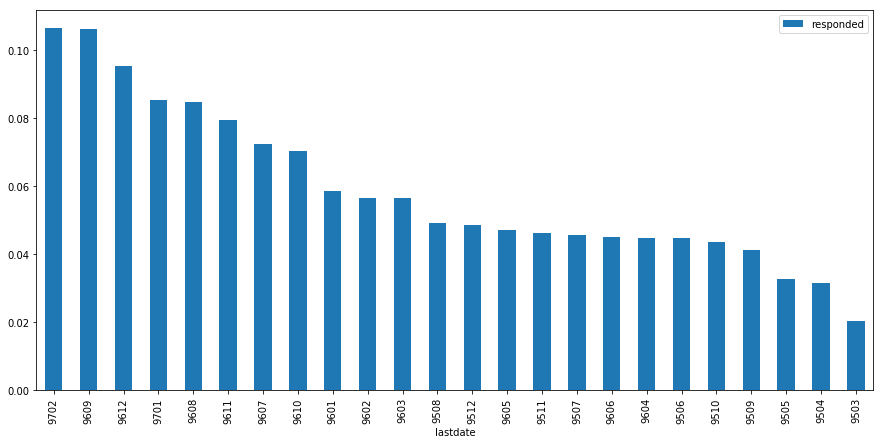

In [249]:
#data visualization
#The last date VS response
fig, ax = plt.subplots(figsize=(15,7))
r_lastdate = train_data[['lastdate','responded']].groupby('lastdate', as_index = False).mean().sort_values(by='responded', ascending = False)
r_lastdate.plot.bar(x='lastdate',y='responded',ax=ax)
plt.show()

In [230]:
#ngiftall: total number of gifts
#ngiftall vs response
train_data[['ngiftall','responded']].groupby('ngiftall',as_index=False).mean().sort_values(by='responded', ascending=False)

,ngiftall,responded
85,91,1.000000
79,82,1.000000
84,89,0.500000
62,63,0.250000
75,77,0.250000
68,69,0.200000
54,55,0.187500
59,60,0.181818
67,68,0.166667
53,54,0.163265


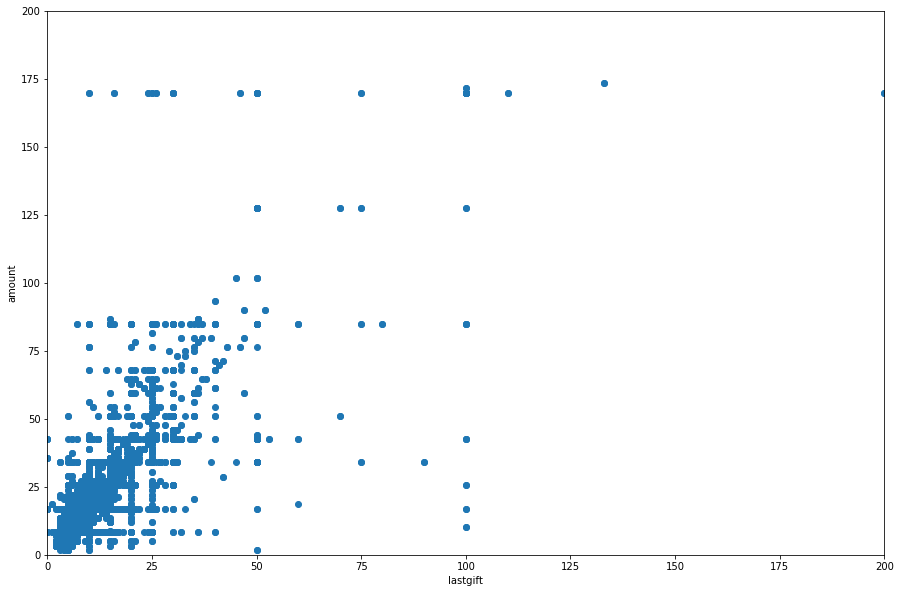

In [286]:
#lastgift: Dollar amount of most recent gift
fig, ax = plt.subplots(figsize=(15,10))
plt.scatter(x='lastgift',y='amount',data=train_data)
plt.xlabel('lastgift')
plt.ylabel('amount')
plt.xlim(0,200)
plt.ylim(0,200)
plt.show()
fig.savefig('lastgift')

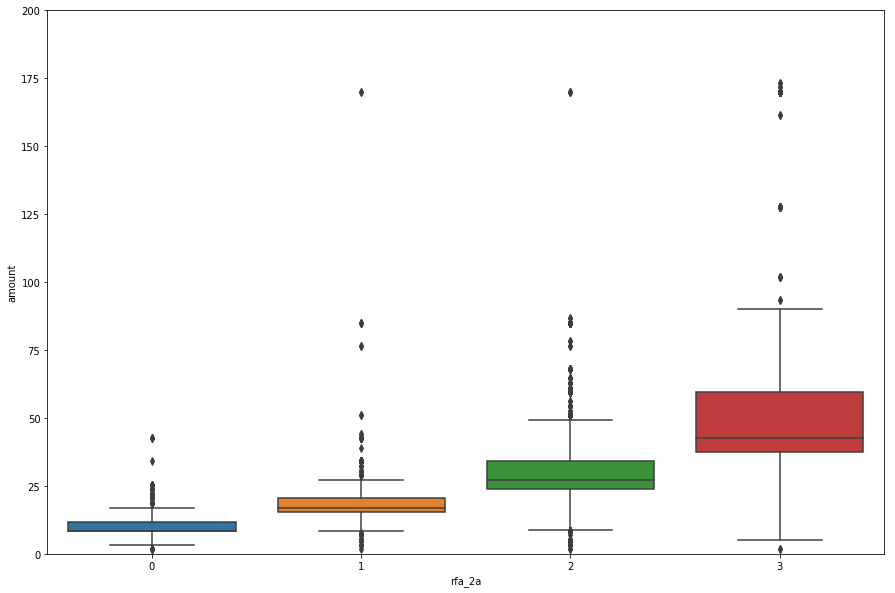

In [283]:
#rfa_2a: Donation Amount code for rfa_2
fig, ax = plt.subplots(figsize=(15,10))
box_rfa_2a = sns.boxplot(x='rfa_2a',y='amount',data=train_data)
box_rfa_2a.set(ylim=[0,200])
plt.show()
fig.savefig('rfa_2a')

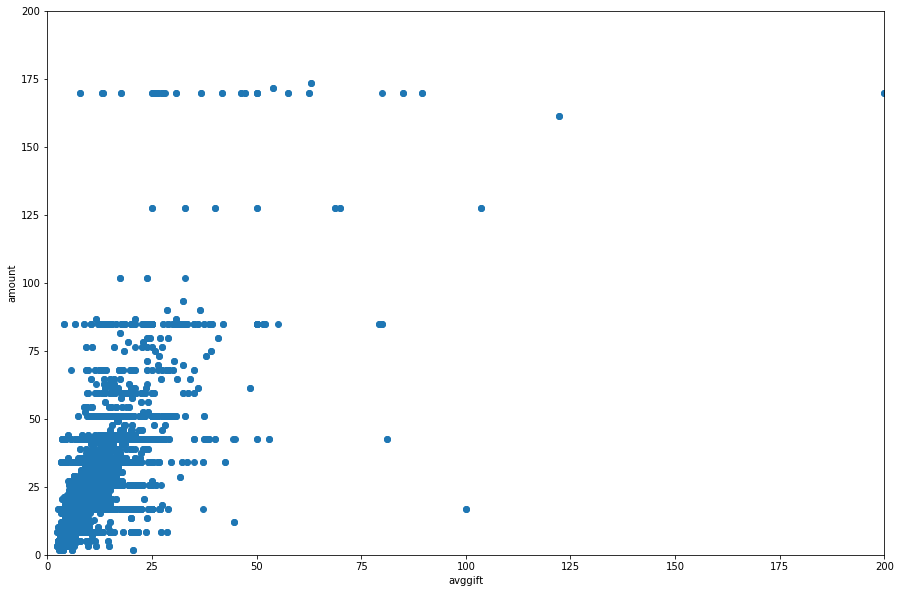

In [288]:
#avggift: Average dollar amount of gifts to date
fig, ax = plt.subplots(figsize=(15,10))
plt.scatter(x='avggift',y='amount',data=train_data)
plt.xlabel('avggift')
plt.ylabel('amount')
plt.xlim(0,200)
plt.ylim(0,200)
plt.show()
fig.savefig('avggift')